# Graphing and Plotting

### Importing Necessary Libraries

In [99]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

### Reading in the formatted bike share data
Retrieved from the JSON file formatted in another notebook

In [89]:
df = pd.read_json('cleaned_bike_share_data.json')

### Generating a scatterplot of the number of bikes used between 2011 - 2012

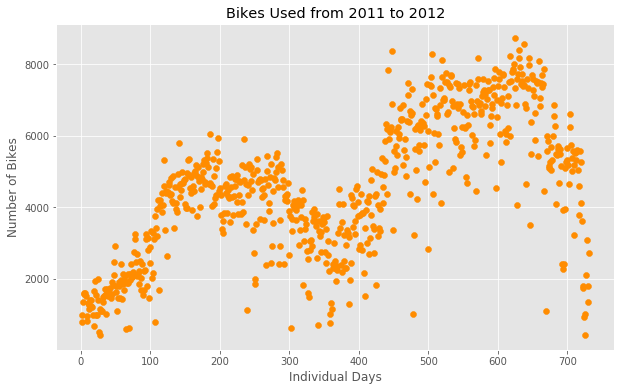

In [114]:
plt.figure(figsize=(10,6))
plt.style.use('ggplot')

plt.scatter(df.instant, df.cnt, c='darkorange')

plt.xlabel('Individual Days')
plt.ylabel('Number of Bikes')
plt.title('Bikes Used from 2011 to 2012')

# Exporting a saved image of our plot
plt.savefig('scatter_bike_count.png')

plt.show()

In [ ]:
# Exporting a image of our plot

## Creating a Regression Line
### Tools used:
- ScikitLearn - For LinearRegression, fitting the model, and predicting y-values
- Matplotlib - For generating our graph with the regression line


The data was converted by using a simple linear regression line in order to normalize the increasing trend from the first year to the next.  The residual differences between the predicted values from the regression line and the actual values was then used as the new dependent variable in place of the bike count.

The regression line was found using ScikitLearn's LinearRegression function. 

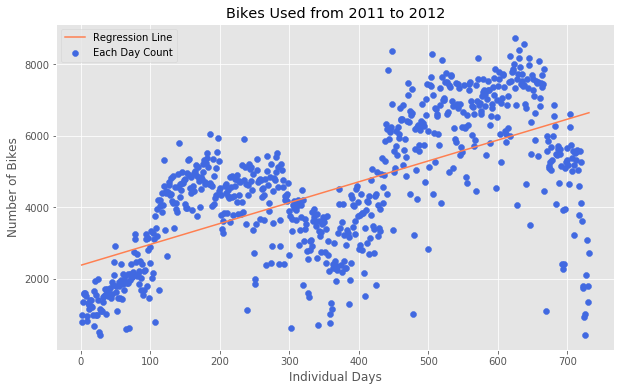

In [115]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))

# Assigning proper values
x=df.instant.values.reshape(-1,1)
y=df.cnt.values.reshape(-1,1)

# Simple Linear Regression Line

model = LinearRegression()
model.fit(x, y)                 # Fitting the line to the data
predictions = model.predict(x)  # Predicting potential y-values

# Plotting
plt.scatter(df['instant'], df['cnt'], label='Each Day Count', c='royalblue')

plt.plot(df['instant'],predictions,c='coral', label='Regression Line')
plt.xlabel('Individual Days')
plt.ylabel('Number of Bikes')
plt.title('Bikes Used from 2011 to 2012')
plt.legend()

# Exporting a saved image of our plot
plt.savefig('scatter_bike_regression.png')

plt.show()

### Calculating the Residuals

In [97]:
# Storing predicted values into a new column
df['predictions'] = predictions         # Creating a new column for the linear regression line predictions
df['resids'] = df.cnt - df.predictions  # Creating a new column containing the differences between actual bike count and predicted count
df

,atemp,casual,clear,cnt,dteday,fall,holiday,hum,instant,light_storm,...,temp,weather,weathersit,weekday,windspeed,winter,workingday,yr,predictions,resids
0,0.363625,331,1,985,734138,0,0,0.805833,1,0,...,0.344167,clear,2,6,0.160446,1,0,0,2386.114291,-1401.114291
1,0.353739,131,1,801,734139,0,0,0.696087,2,0,...,0.363478,clear,2,0,0.248539,1,0,0,2391.941100,-1590.941100
2,0.189405,120,0,1349,734140,0,0,0.437273,3,0,...,0.196364,misty,1,1,0.248309,1,1,0,2397.767909,-1048.767909
3,0.212122,108,0,1562,734141,0,0,0.590435,4,0,...,0.200000,misty,1,2,0.160296,1,1,0,2403.594718,-841.594718
4,0.229270,82,0,1600,734142,0,0,0.436957,5,0,...,0.226957,misty,1,3,0.186900,1,1,0,2409.421527,-809.421527
5,0.233209,88,0,1606,734143,0,0,0.518261,6,0,...,0.204348,misty,1,4,0.089565,1,1,0,2415.248337,-809.248337
6,0.208839,148,1,1510,734144,0,0,0.498696,7,0,...,0.196522,clear,2,5,0.168726,1,1,0,2421.075146,-911.075146
7,0.162254,68,1,959,734145,0,0,0.535833,8,0,...,0.165000,clear,2,6,0.266804,1,0,0,2426.901955,-1467.901955
8,0.116175,54,0,822,734146,0,0,0.434167,9,0,...,0.138333,misty,1,0,0.361950,1,0,0,2432.728764,-1610.728764
9,0.150888,41,0,1321,734147,0,0,0.482917,10,0,...,0.150833,misty,1,1,0.223267,1,1,0,2438.555573,-1117.555573


##### Exporting this new DataFrame as a pickle for use in another notebook

In [85]:
df.to_pickle('Residuals_df')

### Graphing the residual values derived from the function above
The residual function and its returned values have normalized the increasing trend from the bike count.

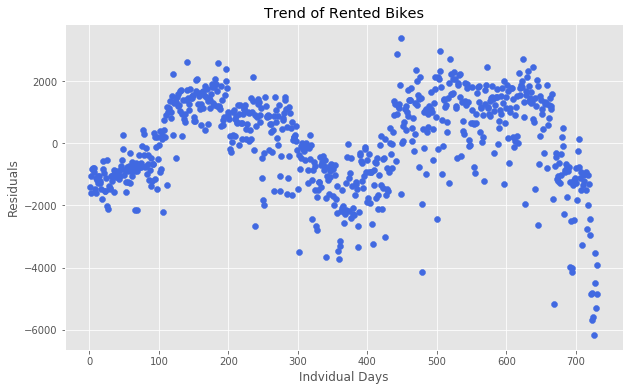

In [116]:
# Scatterplot of our Residuals
plt.style.use('ggplot')
plt.figure(figsize=(10,6))

plt.scatter(df.instant, df.resids, c="royalblue")

plt.xlabel('Indvidual Days')
plt.ylabel("Residuals")
plt.title("Trend of Rented Bikes")

# Exporting a saved image of our plot
plt.savefig('scatter_bike_trend.png')

plt.show()

## Final DataFrame for Graphing and Plotting

In [161]:
final_df = pd.read_pickle('Final_DF')

### Graphing Features

#### Feature interaction of temperature, fall season, and humidity

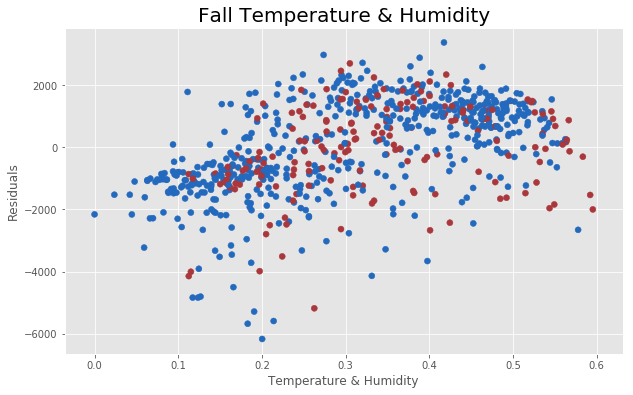

In [139]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.scatter(final_df['hum_temp'],final_df['resids'], c=final_df['fall'], cmap='vlag')

plt.xlabel('Temperature & Humidity')
plt.ylabel('Residuals')
plt.title('Fall Temperature & Humidity', fontdict={'fontsize': 20})

plt.savefig('fall_temp_hum.png')

plt.show()

#### Feature interaction of misty weather and humidity

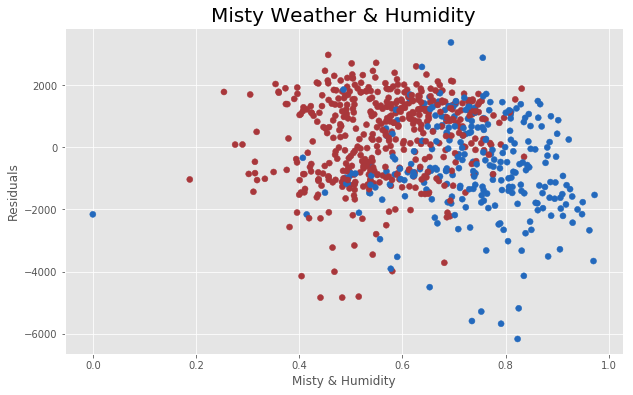

In [138]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.scatter(final_df['hum'],final_df['resids'], c=final_df['misty'], cmap='vlag')

plt.xlabel('Misty & Humidity')
plt.ylabel('Residuals')
plt.title('Misty Weather & Humidity', fontdict={'fontsize': 20})

plt.savefig('misty_hum.png')

plt.show()

#### Feature interaction of Clear, Humid, Summer

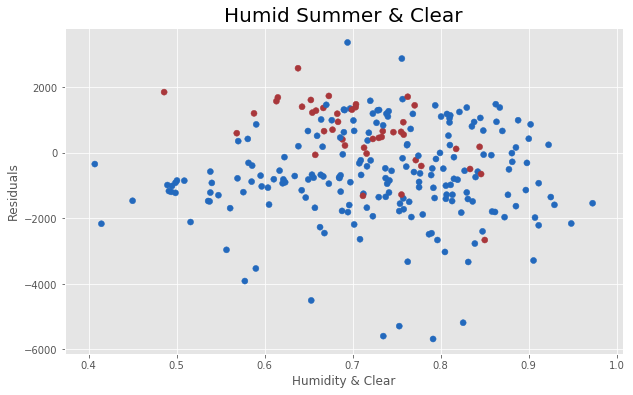

In [160]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
odf = final_df[final_df.clear>0]
plt.scatter(odf['hum'],odf['resids'], c=odf['summer'], cmap='vlag')

plt.xlabel('Humidity & Clear')
plt.ylabel('Residuals')
plt.title('Humid Summer & Clear', fontdict={'fontsize': 20})

plt.savefig('clear_hum_summer.png')

plt.show()

#### Feature interaction of temperature, misty weather, and a working day

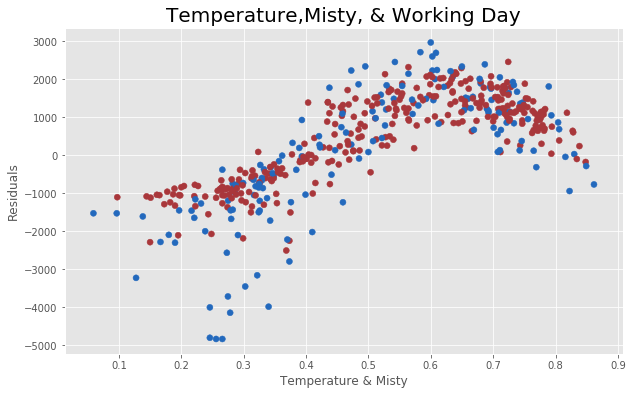

In [168]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
odf = final_df[final_df.misty>0]
plt.scatter(odf['temp'],odf['resids'], c=odf['workingday'], cmap='vlag')

plt.xlabel('Temperature & Misty')
plt.ylabel('Residuals')
plt.title('Temperature,Misty, & Working Day', fontdict={'fontsize': 20})

plt.savefig('temp_misty_workingday.png')

plt.show()

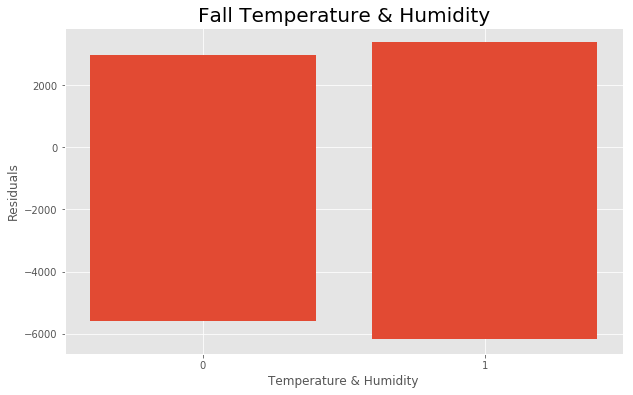

In [166]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.bar(final_df['workingday'],final_df['resids'])

plt.xlabel('Temperature & Humidity')
plt.xticks([0,1])
plt.ylabel('Residuals')
plt.title('Fall Temperature & Humidity', fontdict={'fontsize': 20})

#plt.savefig('fall_temp_hum.png')

plt.show()

KeyError: 'winter'

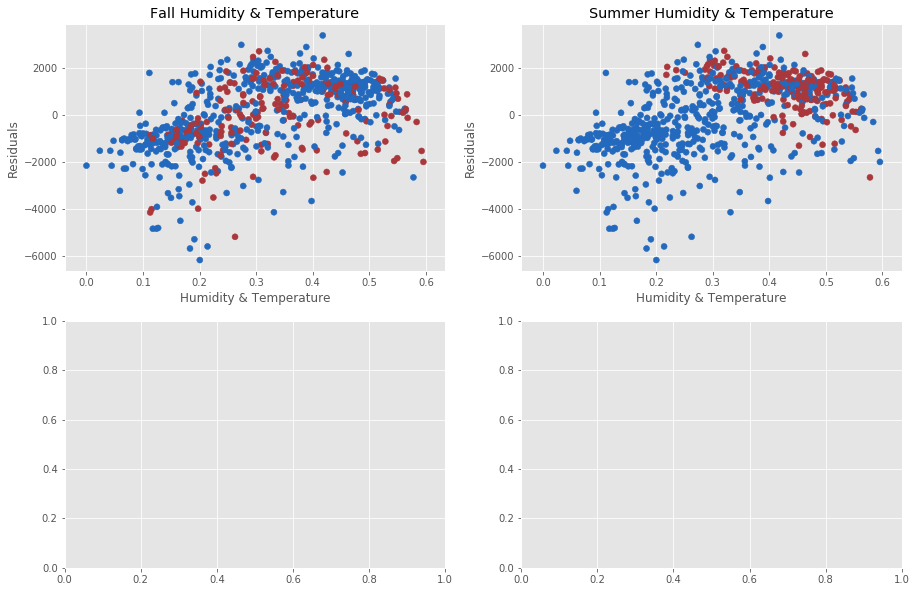

In [135]:
# Relationship between Residuals and temperature per each season
plt.style.use('ggplot')
fig, ax = plt.subplots(2,2, figsize=(15,10))

# Variables to change
# Interaction between season and temperature
Y = final_df['resids']
X = final_df['hum_temp']
season = ['fall', 'summer', 'winter', 'spring']
resid = 'Residuals'
feat = 'Humidity & Temperature'

# Plotting each graph
ax[0,0].scatter(X, Y, c=final_df[f'{season[0]}'], cmap='vlag')
ax[0,0].set_xlabel(f'{feat}')
ax[0,0].set_ylabel(f'{resid}')
ax[0,0].set_title(f'{season[0].capitalize()} {feat}')

ax[0,1].scatter(X, Y, c=final_df[f'{season[1]}'], cmap='vlag')
ax[0,1].set_xlabel(f'{feat}')
ax[0,1].set_ylabel(f'{resid}')
ax[0,1].set_title(f'{season[1].capitalize()} {feat}')

ax[1,1].scatter(X, Y, c=final_df[f'{season[2]}'], cmap='vlag')
ax[1,1].set_xlabel(f'{feat}')
ax[1,1].set_ylabel(f'{resid}')
ax[1,1].set_title(f'{season[2].capitalize()} {feat}')

ax[1,0].scatter(X, Y, c=final_df[f'{season[3]}'], cmap='vlag')
ax[1,0].set_xlabel(f'{feat}')
ax[1,0].set_ylabel(f'{resid}')
ax[1,0].set_title(f'{season[3].capitalize()} {feat}')

plt.show()

### Feature interaction of humidity and season

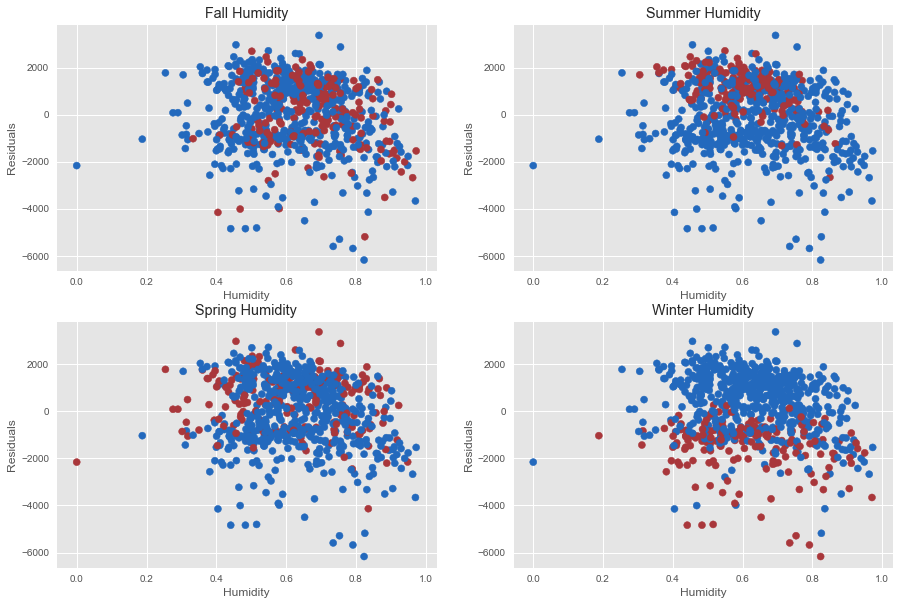

In [181]:
# Relationship between Residuals and humidity per each season
plt.style.use('ggplot')
fig, ax = plt.subplots(2,2, figsize=(15,10))

# Variables to change
# Interaction between humidity and temperature
Y = df['resids']
X = df['hum']
season = ['fall', 'summer', 'winter', 'spring']
resid = 'Residuals'
feat = 'Humidity'

# Plotting each graph
ax[0,0].scatter(X, Y, c=df[f'{season[0]}'], cmap='vlag')
ax[0,0].set_xlabel(f'{feat}')
ax[0,0].set_ylabel(f'{resid}')
ax[0,0].set_title(f'{season[0].capitalize()} {feat}')

ax[0,1].scatter(X, Y, c=df[f'{season[1]}'], cmap='vlag')
ax[0,1].set_xlabel(f'{feat}')
ax[0,1].set_ylabel(f'{resid}')
ax[0,1].set_title(f'{season[1].capitalize()} {feat}')

ax[1,1].scatter(X, Y, c=df[f'{season[2]}'], cmap='vlag')
ax[1,1].set_xlabel(f'{feat}')
ax[1,1].set_ylabel(f'{resid}')
ax[1,1].set_title(f'{season[2].capitalize()} {feat}')

ax[1,0].scatter(X, Y, c=df[f'{season[3]}'], cmap='vlag')
ax[1,0].set_xlabel(f'{feat}')
ax[1,0].set_ylabel(f'{resid}')
ax[1,0].set_title(f'{season[3].capitalize()} {feat}')

plt.show()

#### Features interaction of weather and humidity

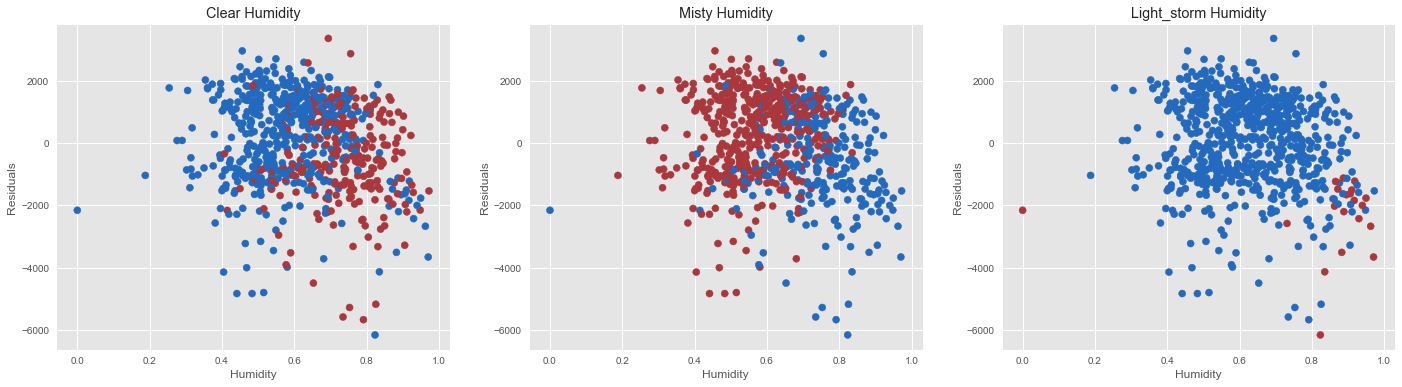

In [198]:
# Relationship between Residuals and weather per each season
plt.style.use('ggplot')
fig, ax = plt.subplots(1,3, figsize=(24,6))

# Variables to change
# Interaction between humidity and weather
Y = df['resids']
X = df['hum']
weather = ['clear', 'misty', 'light_storm']
resid = 'Residuals'
feat = 'Humidity'

# Plotting each graph

for i in range(len(weather)):
    ax[i].scatter(X, Y, c=df[f'{weather[i]}'], cmap='vlag')
    ax[i].set_xlabel(f'{feat}')
    ax[i].set_ylabel(f'{resid}')
    ax[i].set_title(f'{weather[i].capitalize()} {feat}')

plt.show()

AttributeError: Unknown property c

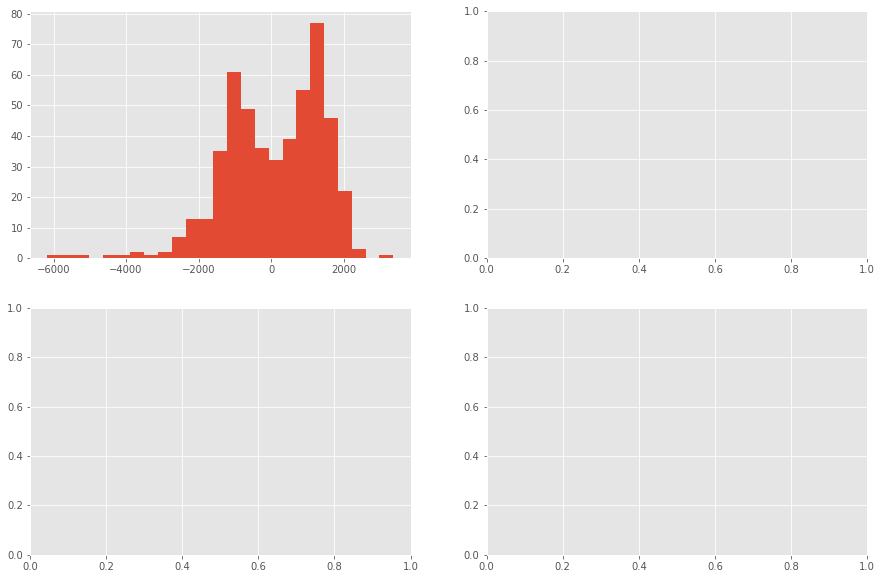

In [110]:
# Relationship between Residuals and humidity per each season
plt.style.use('ggplot')
fig, ax = plt.subplots(2,2, figsize=(15,10))

# Variables to change
# Interaction between humidity and temperature
Y = df[df['workingday']>0].resids
X = df[df['workingday']>0].workingday
wdf = df[df['workingday']>0]
season = ['fall', 'summer', 'winter', 'spring']
resid = 'Residuals'
feat = 'Workingday'

# Plotting each graph
ax[0,0].hist(Y, bins=25, c=wdf[f'{season[0]}'], cmap='vlag')
ax[0,0].set_xlabel(f'{feat}')
ax[0,0].set_ylabel(f'{resid}')
ax[0,0].set_title(f'{season[0].capitalize()} {feat}')

ax[0,1].scatter(X, Y, c=wdf[f'{season[1]}'], cmap='vlag')
ax[0,1].set_xlabel(f'{feat}')
ax[0,1].set_ylabel(f'{resid}')
ax[0,1].set_title(f'{season[1].capitalize()} {feat}')

ax[1,1].scatter(X, Y, c=wdf[f'{season[2]}'], cmap='vlag')
ax[1,1].set_xlabel(f'{feat}')
ax[1,1].set_ylabel(f'{resid}')
ax[1,1].set_title(f'{season[2].capitalize()} {feat}')

ax[1,0].scatter(X, Y, c=wdf[f'{season[3]}'], cmap='vlag')
ax[1,0].set_xlabel(f'{feat}')
ax[1,0].set_ylabel(f'{resid}')
ax[1,0].set_title(f'{season[3].capitalize()} {feat}')

plt.show()